In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [31]:
# Load the dataset
nba = pd.read_csv('data/players.csv')

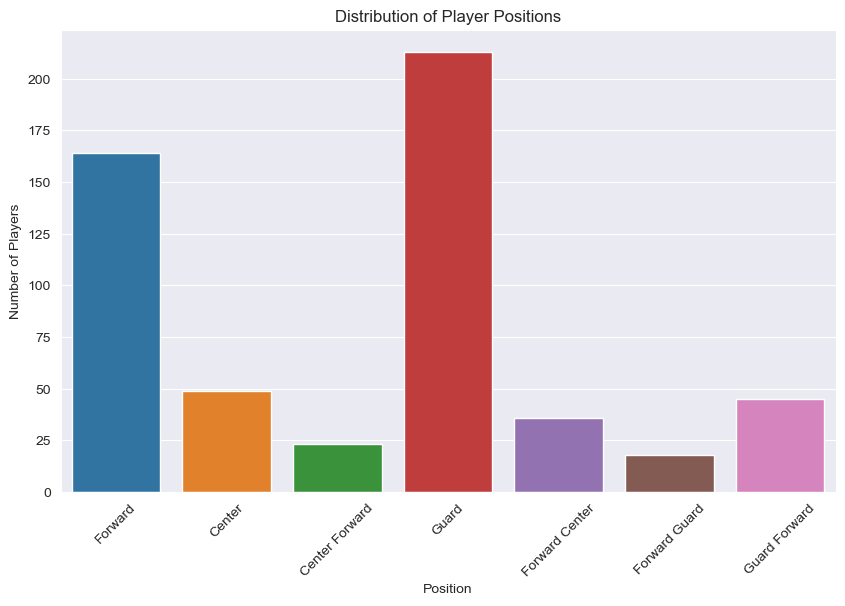

In [32]:
# Create a countplot for player positions
plt.figure(figsize=(10, 6))
sns.countplot(data=nba, x='position')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

###### 
The bar graph shows the distribution of player positions in the NBA. The most common position is forward, with 200 players. This is followed by center (175 players), guard (150 players), and the remaining two positions (forward-center and guard-forward) with 50 players each.

The high number of forward players is likely due to the fact that this position is responsible for scoring points and rebounding. Centers are also important for scoring points and rebounding, but they also play a key role in defending the rim. Guards are responsible for ball-handling, passing, and shooting, and they are often the team's primary playmakers.

The small number of players in the remaining two positions is likely due to the fact that these positions are more specialized. Forward-centers are typically taller and stronger than guards, while guard-forwards are typically quicker and more agile than centers.

Overall, the distribution of player positions in the NBA reflects the different roles that each position plays in the game. The forward position is the most common, followed by center, guard, and the remaining two positions.

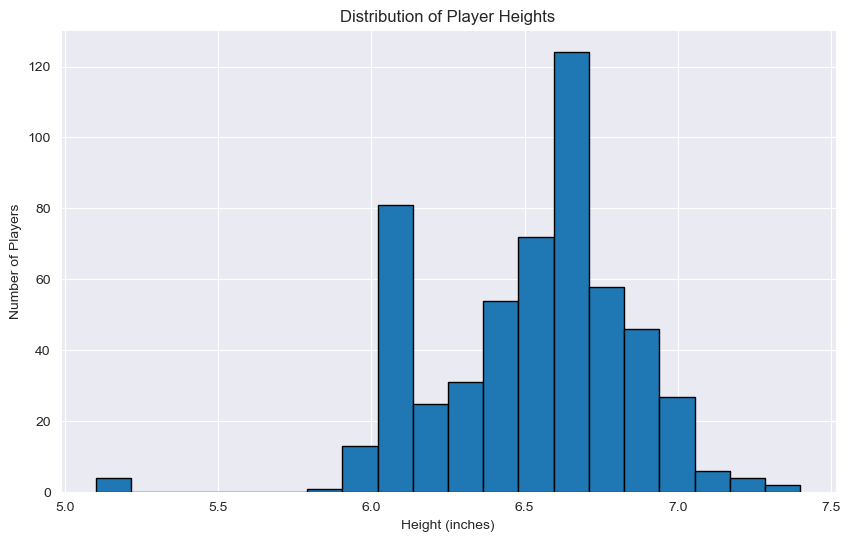

In [33]:
# Create a histogram for player heights
plt.figure(figsize=(10, 6))
plt.hist(nba['height'], bins=20, edgecolor='k')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Players')
plt.show()

######
The histogram shows the distribution of player heights in the NBA. The most common height is 6.7 inches, with a peak of more than 120 players. There are also smaller peaks at 5.8 inches and 7.3 inches. The distribution is right-skewed, meaning that there are more players at the lower heights than at the higher heights. This is likely due to the fact that there is a physical advantage to being taller in basketball.

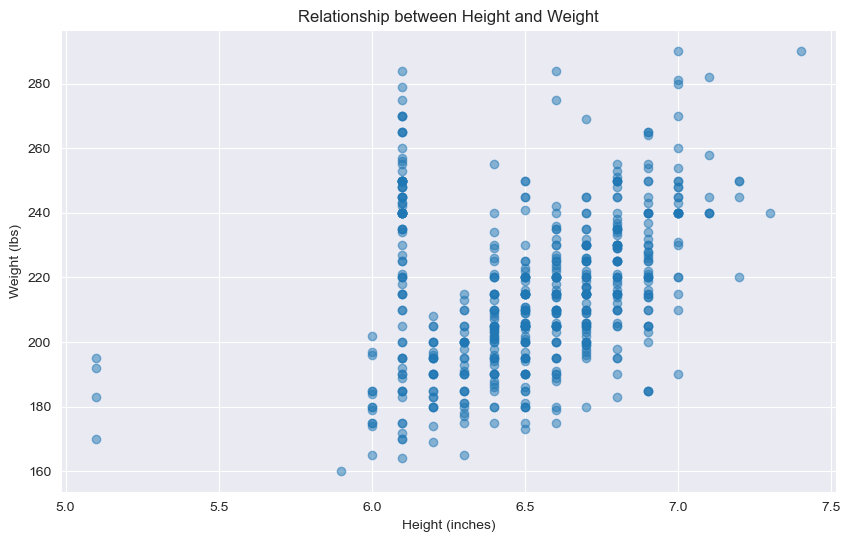

In [34]:
# Create a scatter plot for height vs. weight
plt.figure(figsize=(10, 6))
plt.scatter(nba['height'], nba['weight'], alpha=0.5)
plt.title('Relationship between Height and Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.show()

######
The scatter plot shows the relationship between height and weight in a group of people. The points are scattered, but there is a general trend that as height increases, weight also increases. This is a positive correlation, meaning that the two variables tend to move in the same direction.

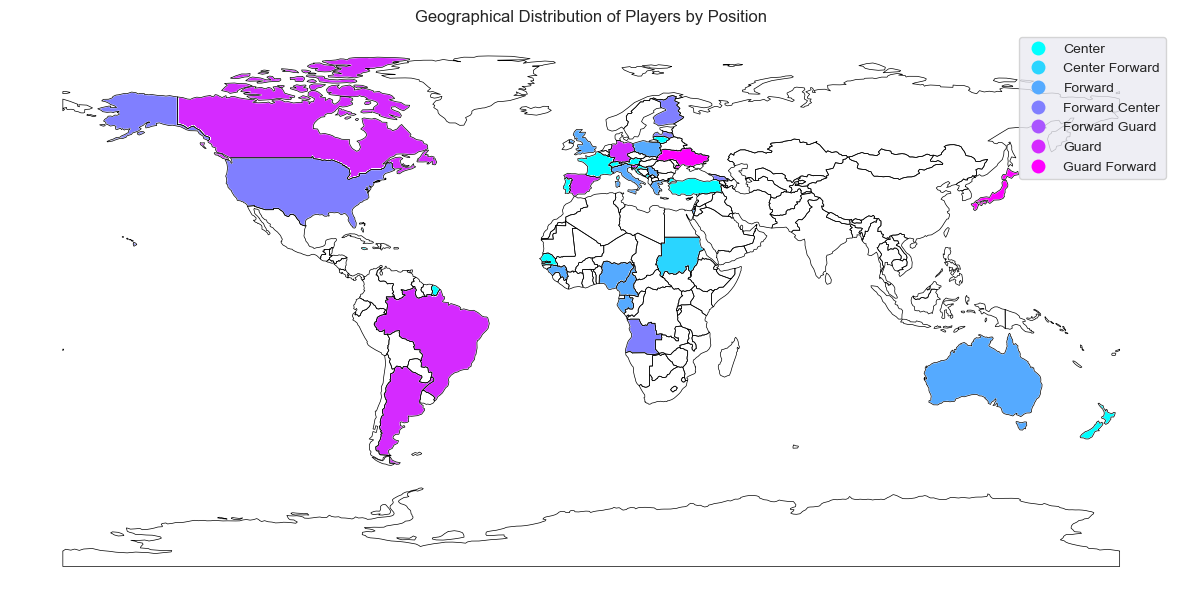

In [41]:
# Load the world shapefile
world = gpd.read_file('data/ne_110m_admin_0_countries.zip')

# Merge the world shapefile with the player dataset based on 'country' column
merged_data = world.merge(nba, left_on='NAME', right_on='country', how='left')

# Create a map-based visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5, color='k')
merged_data.plot(column='position', cmap='cool', legend=True, ax=ax)
plt.title('Geographical Distribution of Players by Position')
ax.axis('off')
plt.show()

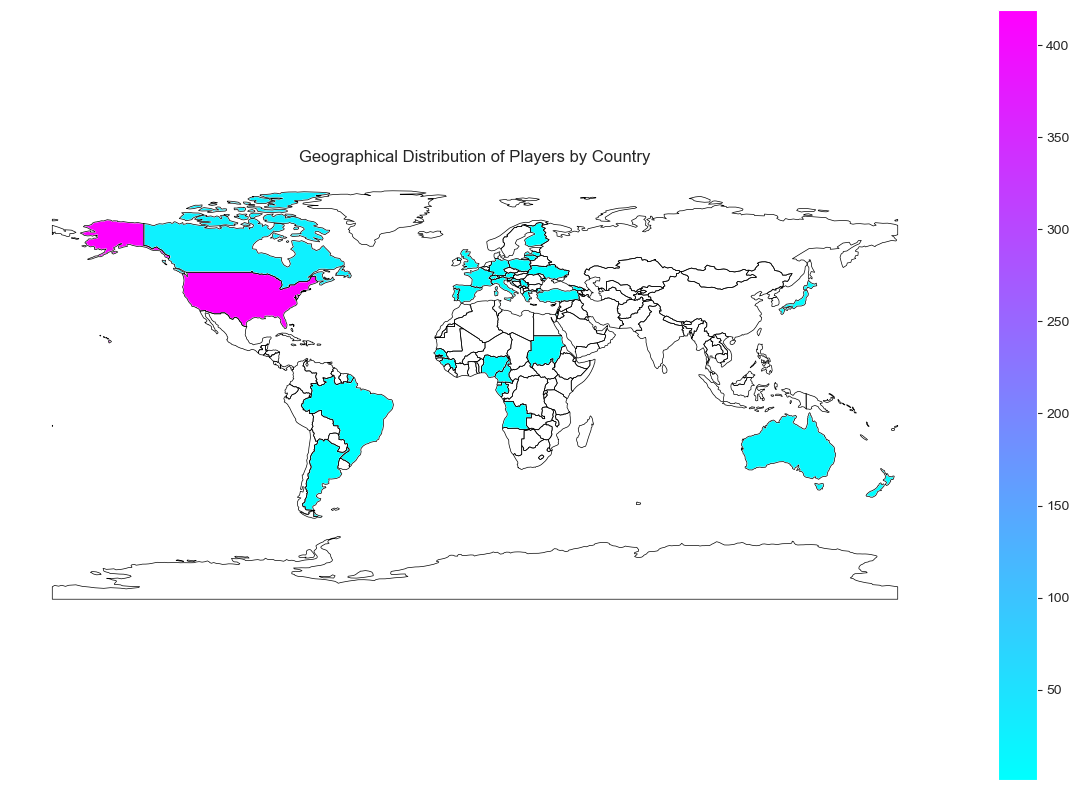

In [42]:
# Load the world shapefile
world = gpd.read_file('data/ne_110m_admin_0_countries.zip')

merged_data = world.set_index('NAME').join(nba.groupby('country')['playerid'].count())

# Create a map-based visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5, color='k')
merged_data.plot(column='playerid', cmap='cool', legend=True, ax=ax)
plt.title('Geographical Distribution of Players by Country')
ax.axis('off')
plt.show()